# PCA

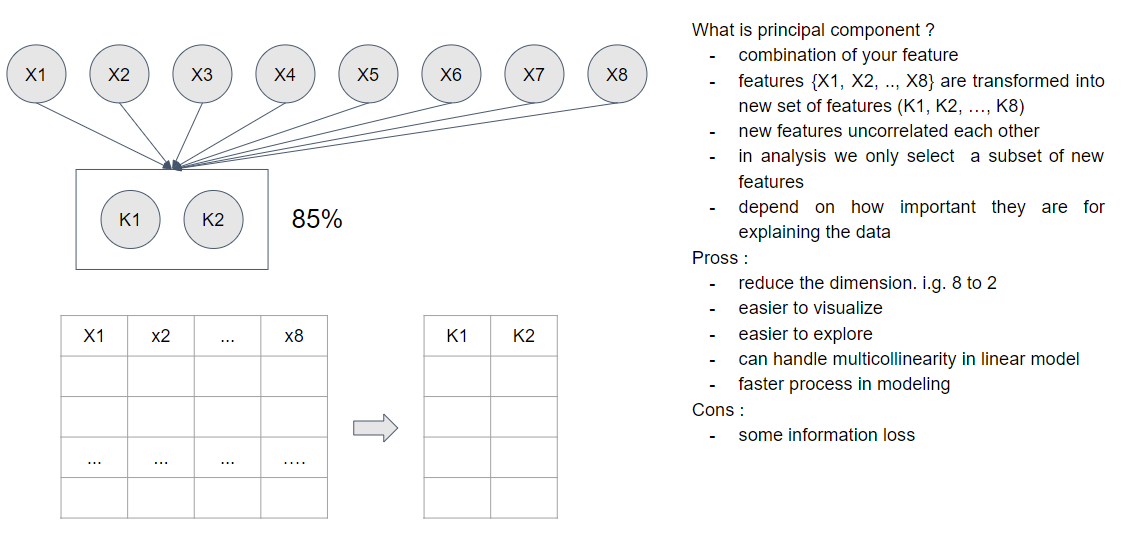

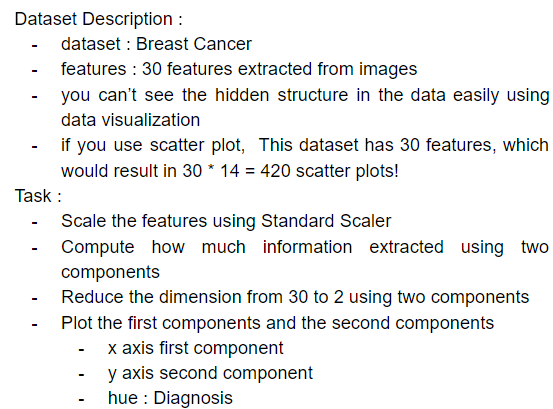

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

> ## Scaler

In [2]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

> ## Information Extracted

In [3]:
from sklearn.decomposition import PCA

# made 30 components
pca = PCA(n_components = 30)
pca.fit(X_scaled)

# transform the data
X_pca = pca.transform(X_scaled)

In [4]:
variance = []

for i in range(0,30):
  variance.append(np.var(X_pca[:,i]))

In [6]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 63.24320765155943 %


> ## Reducing Dimension (30 to 2)

In [ ]:
# only keep two components
pca = PCA(n_components = 2)
pca.fit(X_scaled)

# transform the data
X_pca = pca.transform(X_scaled)

In [ ]:
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


> ## Scatter Plot and Clustering Result

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Second Component')

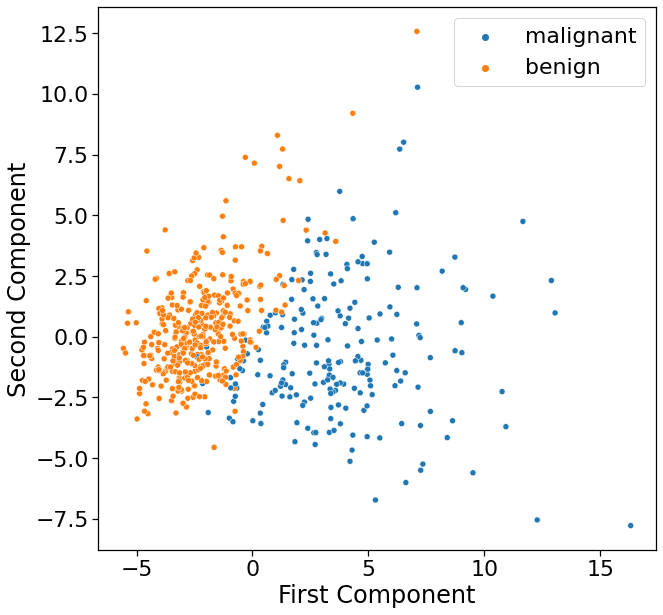

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    X_pca[:,0],
    X_pca[:,1],
    hue = np.where(cancer.target,'benign','malignant'))

plt.xlabel('First Component')
plt.ylabel('Second Component')

Result :
- Information extracted from 2 component 63.24 % 
- We reduce the dimension from 30 to 2 and the lost information is 36.76% but you can see that those two features can separate benign and malignant quiet well
- this also means that you can see hidden structure within the data
- malignant points are more spread than benign point


# Clustering k-Means 1

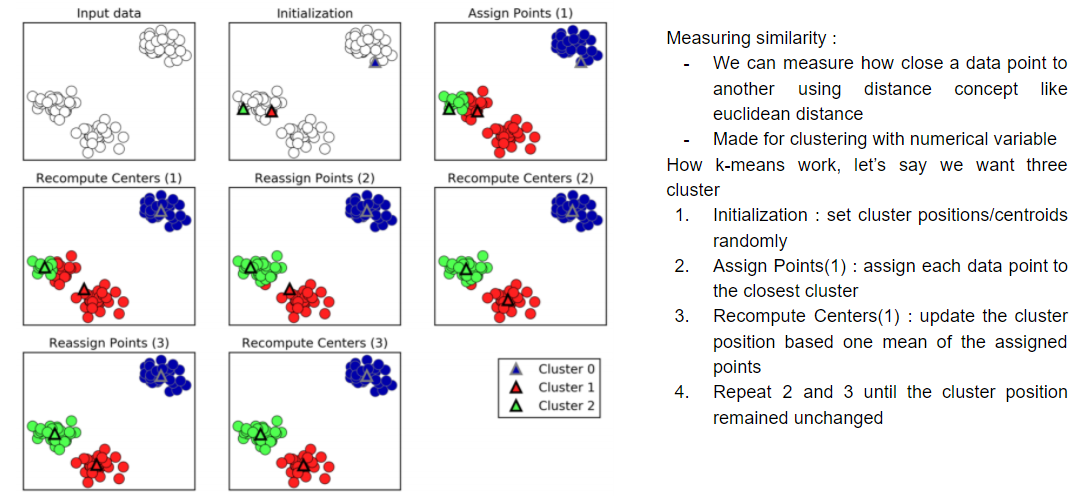

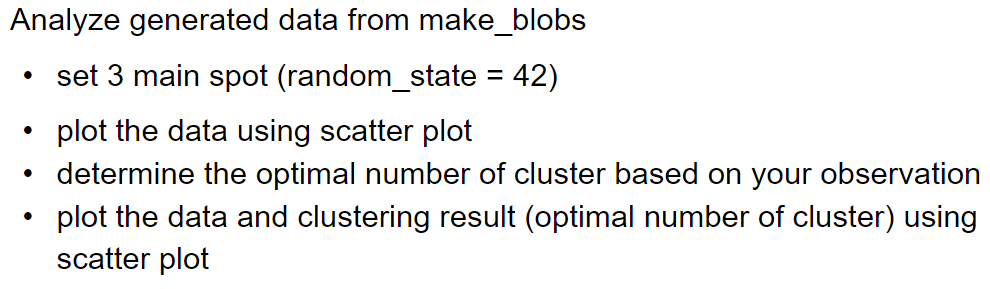

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

> ## Generate Data

In [9]:
X, y = make_blobs(random_state = 42)

> ## Scatter Plot

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

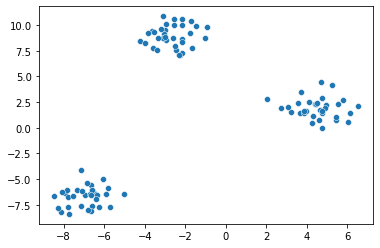

In [10]:
sns.scatterplot(X[:,0],X[:,1])

> ## Fit K-Means

In [14]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

> ## Scatterplot and Clustering Result

In [15]:
kmeans.labels_

array([1, 2, 3, 2, 1, 2, 3, 2, 2, 0, 0, 1, 1, 0, 3, 1, 1, 3, 1, 1, 0, 1,
       1, 3, 3, 3, 2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 3, 2,
       0, 2, 2, 2, 0, 2, 3, 3, 3, 2, 1, 0])

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

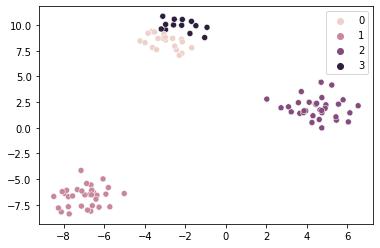

In [16]:
sns.scatterplot(X[:,0],X[:,1], hue = kmeans.labels_)

# Clustering k-Means 2

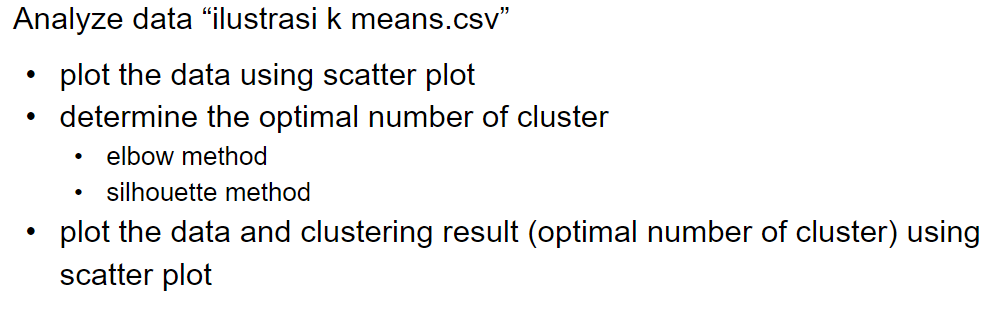

In [17]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score 

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [18]:
df = pd.read_csv('E:/Download/ilustrasi_k_means.csv', sep = ";")
X = df

In [19]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


Text(0, 0.5, 'Tinggi Badan Istri')

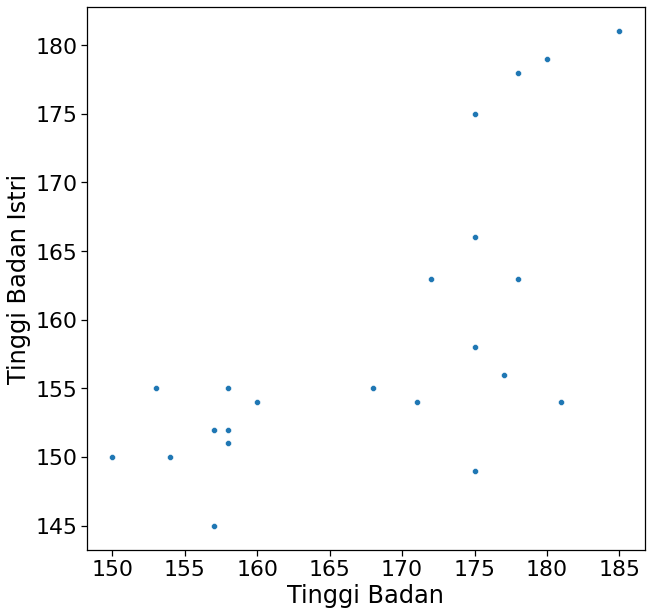

In [20]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

> ## Determine The Optimal Number Of Cluster

ELBOW METHOD

In [21]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(X, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis=1) for D in D_k] 
dist = [np.min(D, axis=1) for D in D_k] 
avgWithinSS = [sum(d)/X.shape[0] for d in dist] 

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


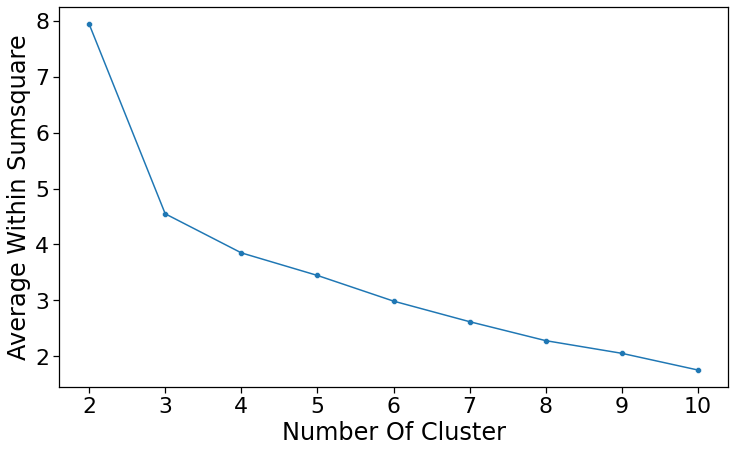

In [22]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

SHILHOUETTE METHOD

In [23]:
  kmeans = KMeans(n_clusters = 2)
  kmeans.fit(X)

KMeans(n_clusters=2)

In [24]:
labels = kmeans.labels_
silhouette_score(X, labels, metric = 'euclidean')

0.5225738334135629

In [25]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean'))

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


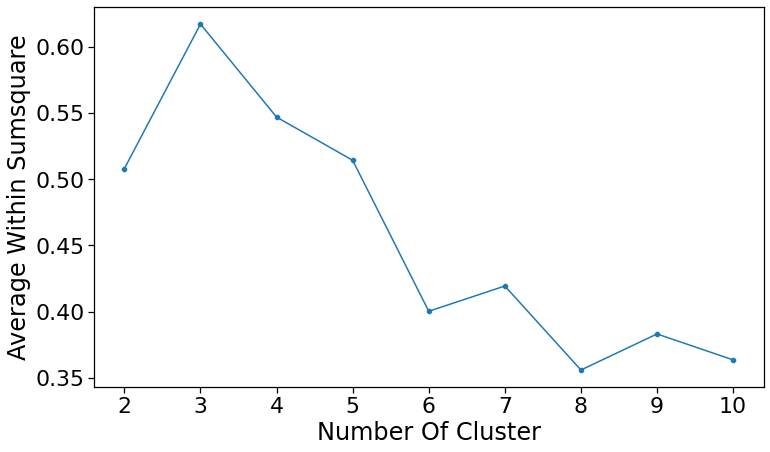

In [26]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

> ## Final Result

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['cluster'] = kmeans.labels_

Text(0, 0.5, 'Tinggi Badan Istri')

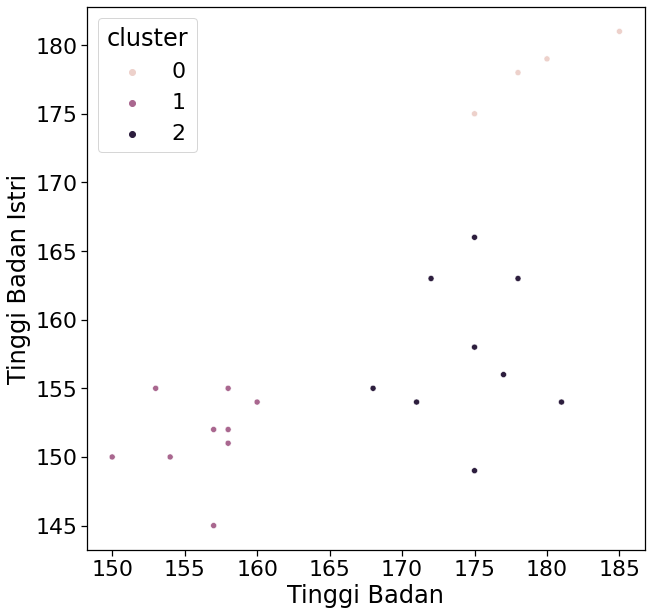

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    hue = 'cluster',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

> # Clustering Agglomerative

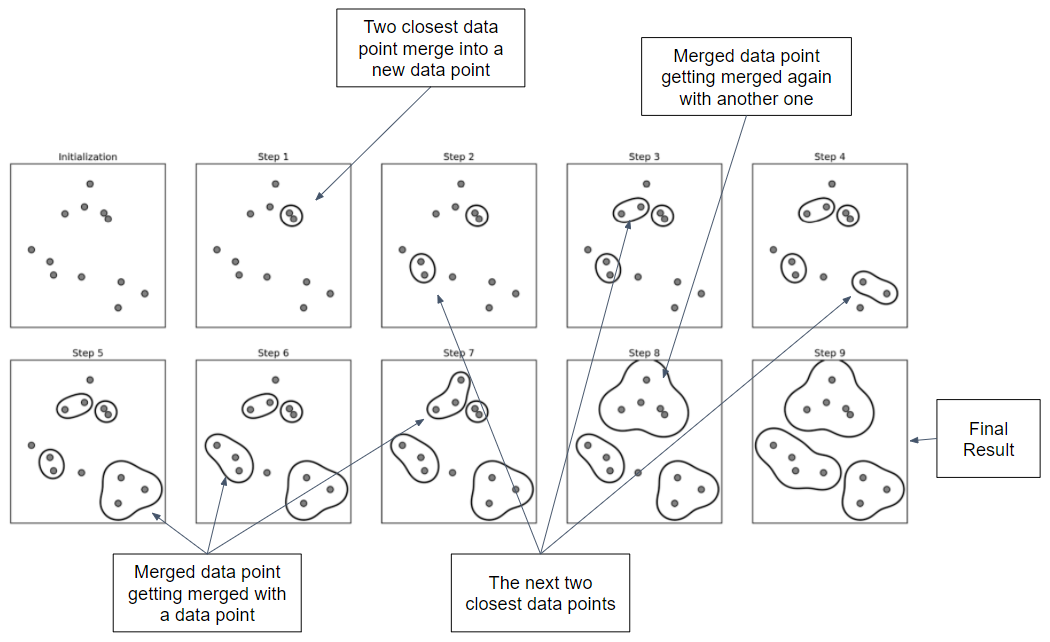

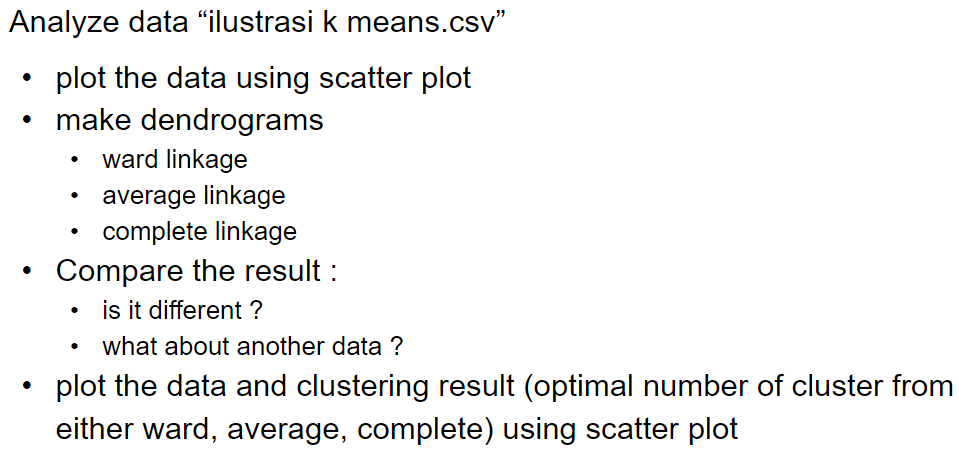

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [ ]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [ ]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


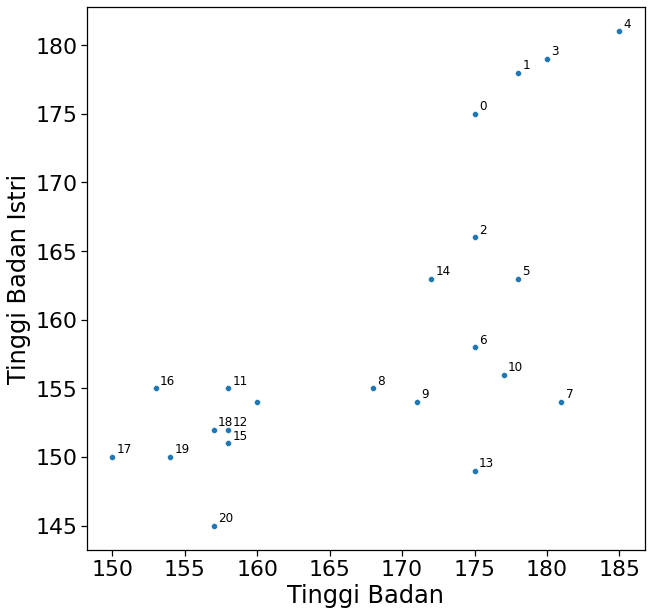

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)

> ## Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

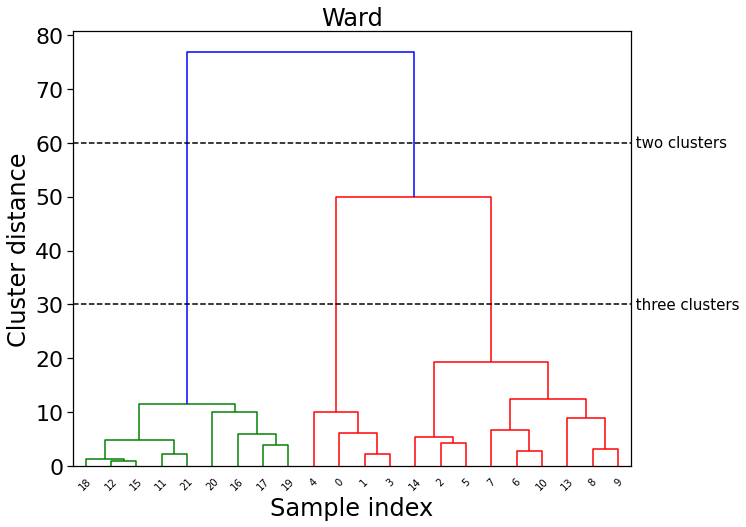

In [ ]:
linkage_array = ward(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [60, 60], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 60, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 30, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

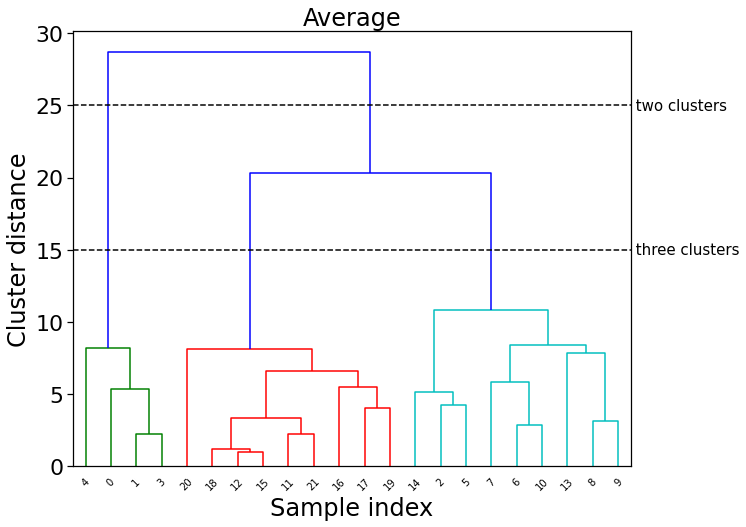

In [ ]:
linkage_array = average(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [25, 25], '--', c='k')
ax.plot(bounds, [15, 15], '--', c='k')
ax.text(bounds[1], 25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 15, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

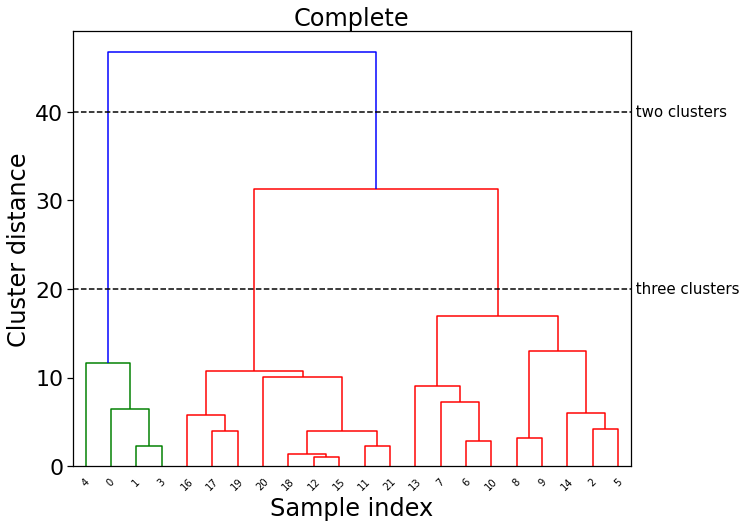

In [ ]:
linkage_array = complete(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [40, 40], '--', c='k')
ax.plot(bounds, [20, 20], '--', c='k')
ax.text(bounds[1], 40, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 20, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

> ## Result Comparisson

In [ ]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
df['ward'] = agg_ward.fit_predict(X)

agg_average = AgglomerativeClustering(n_clusters=3, linkage = 'average')
df['average'] = agg_average.fit_predict(X)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
df['complete'] = agg_complete.fit_predict(X)

In [ ]:
df

,tinggibadan,tinggibadanistri,ward,average,complete
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


> ## Scatter Plot and Clustering Result

Text(0, 0.5, 'Tinggi Badan Istri')

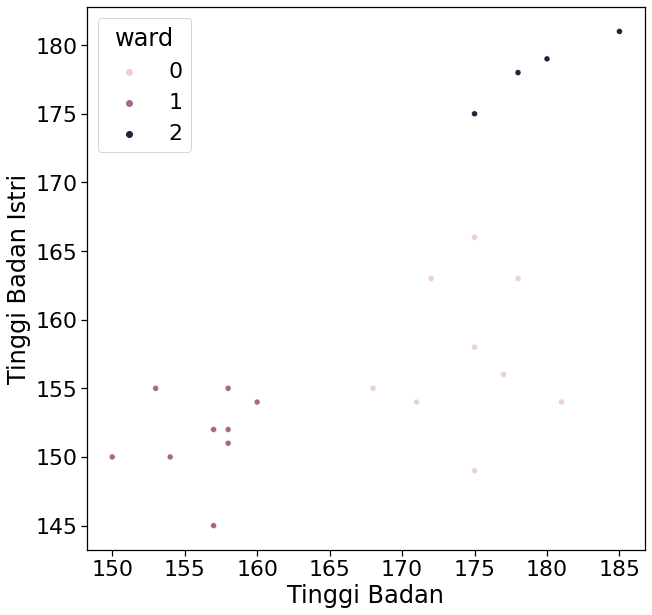

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri',
    hue = 'ward', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# Clustering DBSCAN

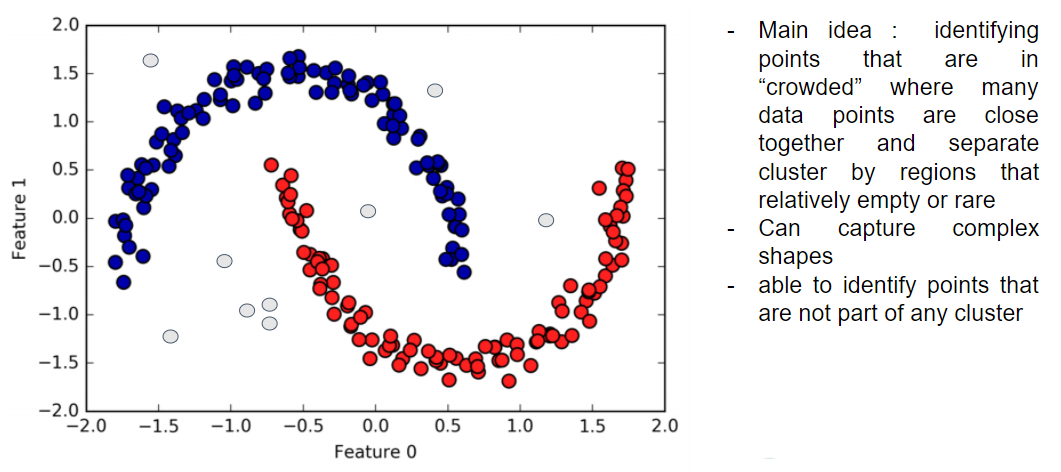

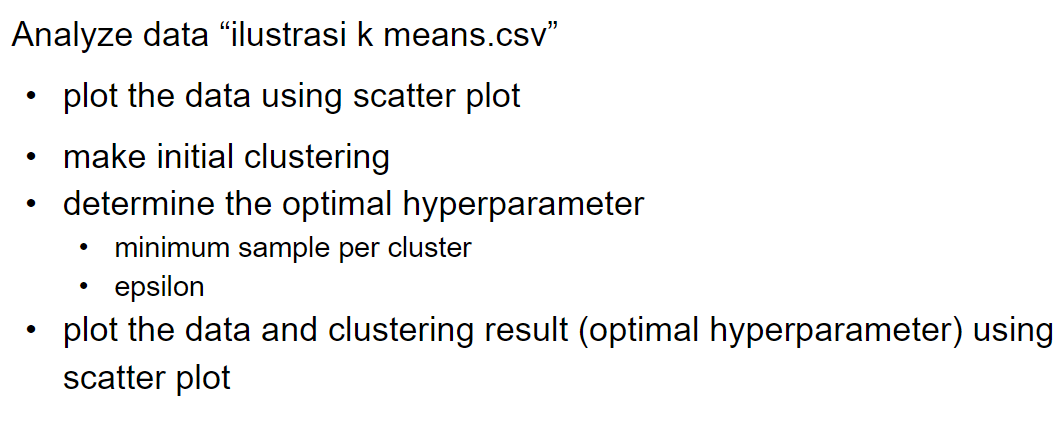

> ## Data

In [ ]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [ ]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


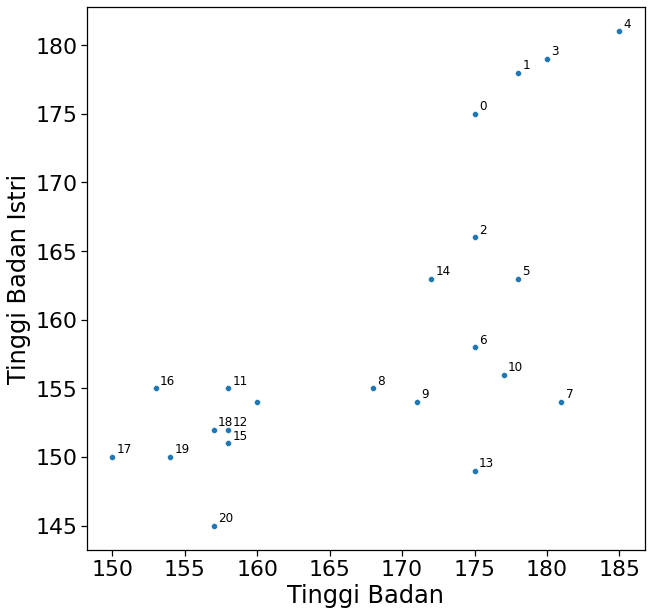

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)

> ## Initial Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps = 0.8, min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
print(clusters)

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [ ]:
silhouette_score(X_scaled, clusters)

0.7021675339118997

> ## Optimizing minimum samples and epsilon

In [ ]:
for eps in [i/10 for i in range(6,8)]:
  for min_samples in range(4,6):
    print("\neps={}".format(eps))
    print("min_samples={}".format(min_samples))
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    silh = silhouette_score(X_scaled, labels)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))
    print("Silhouette Score: {}".format(silh))


eps=0.6
min_samples=4
Clusters present: [-1  0  1]
Cluster sizes: [7 6 9]
Silhouette Score: 0.44715389830389063

eps=0.6
min_samples=5
Clusters present: [-1  0  1]
Cluster sizes: [8 5 9]
Silhouette Score: 0.39283871522974995

eps=0.7
min_samples=4
Clusters present: [0 1 2]
Cluster sizes: [0 4 9 9]
Silhouette Score: 0.7021675339118997

eps=0.7
min_samples=5
Clusters present: [-1  0  1]
Cluster sizes: [4 9 9]
Silhouette Score: 0.7021675339118997


The best clustering result is clustering with hyperparameters eps = 0.7 and min_samples = 4 because no observation included into nois (easier to interpret) and the biggest silhouette score.

> ## Final Result

In [ ]:
dbscan = DBSCAN(eps = 0.7, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
print(clusters)

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [ ]:
df['clusters'] = clusters

Text(0, 0.5, 'Tinggi Badan Istri')

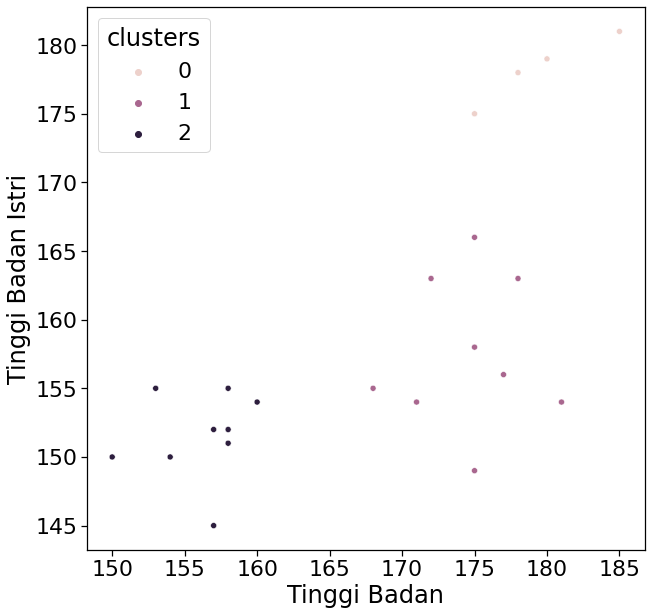

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri',
    hue = 'clusters', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')